In [58]:
import numpy as np
import pandas as pd
from itertools import product
from matplotlib import pyplot as plt

Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

In [2]:
res = list(product(np.arange(0, 2), repeat=4))
res

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [3]:
probabilities = np.ones(len(res)) / 16
probabilities

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

In [4]:
values = list(map(sum, res))
values[:10]

[0, 1, 1, 2, 1, 2, 2, 3, 1, 2]

In [5]:
z = pd.DataFrame({'value': values, 'probability': probabilities})
z

,value,probability
0,0,0.0625
1,1,0.0625
2,1,0.0625
3,2,0.0625
4,1,0.0625
5,2,0.0625
6,2,0.0625
7,3,0.0625
8,1,0.0625
9,2,0.0625


In [6]:
z_probabilities = z.groupby('value')['probability'].sum()

z_probabilities

value
0    0.0625
1    0.2500
2    0.3750
3    0.2500
4    0.0625
Name: probability, dtype: float64

In [9]:
values = np.array([0, 1, 2, 3, 4])
prob = np.array([0.0625, 0.25, 0.375, 0.25, 0.0625])

mean = (values*prob).sum()
mean

2.0

In [10]:
var = (((values - mean)**2)*prob).sum()
var

1.0

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [24]:
def p(k, l=10):
  return (l**k) * (np.exp(-l))/np.math.factorial(k)

In [36]:
agr = []
for i in range (0, 26):
  if not i:
    agr.append(p(i))
  else:
    agr.append(agr[i-1]+p(i))
  
  if agr[i] > 0.95:
    print('N =',i)
    break





N = 15


Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка. 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [41]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

С указанной вероятность гарантия попадания наступает при 1051 выстрелах


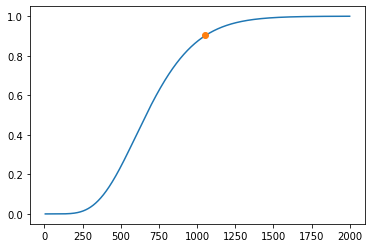

In [82]:
reslist = []
k = 6
max = 2000
count = True
final = 0

for i in range(k, max):
  res = combinations(i, k)*((0.01)**k)*((0.99)**(i-k)) / 100
  if i == k:
    reslist.append(0)
  else:
    reslist.append(res + reslist[i-1-k])

  if count and reslist[i-1-k] > 0.9:
    print(f'С указанной вероятность гарантия попадания наступает при {i} выстрелах')
    final = i
    count = False

plt.plot(range(k, max), reslist)
plt.plot(final, reslist[final], 'o')
